# Quiz 5
Alicia Arifin<br>
20214920001<br>
Statistika

In [2]:
# import numpy, pandas, seaborn, stats and mathplotlib.pyplot
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

Data yang akan digunakan adalah data per-game dari suatu pemain NBA pada tahun 2022-2023. Data dihasilkan dari web-scraping dari Hoopshype dan Basketball Reference [Source:Kaggle](https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season).

In [4]:
nba_stats = pd.read_csv(r"C:\Users\yippi\Downloads\archive (2)\nba_salaries.csv")
nba_stats

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,curryst01
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,walljo01
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,westbru01
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,jamesle01
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,duranke01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,...,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,minayju01
463,463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,...,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,simmoko01
464,464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,...,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,yorkga01
465,465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,...,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,grayra01


In [5]:
# search for information about data
nba_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         467 non-null    int64  
 1   Player Name        467 non-null    object 
 2   Salary             467 non-null    int64  
 3   Position           467 non-null    object 
 4   Age                467 non-null    int64  
 5   Team               467 non-null    object 
 6   GP                 467 non-null    int64  
 7   GS                 467 non-null    int64  
 8   MP                 467 non-null    float64
 9   FG                 467 non-null    float64
 10  FGA                467 non-null    float64
 11  FG%                466 non-null    float64
 12  3P                 467 non-null    float64
 13  3PA                467 non-null    float64
 14  3P%                454 non-null    float64
 15  2P                 467 non-null    float64
 16  2PA                467 non

Variabel yang akan digunakan adalah :
- Salary : Gaji Pemain
- Age    : Umur
- GP     : Berapa kali main dalam satu season
- MP     : Main berapa menit dalam sekali tanding
- FG%    : Persentase pemain berhasil bola masuk ke dalam ring
- FT%    : Persentase pemain berhasil melakukan free-throw
- AST    : Banyaknya Assist /game
- STL    : Banyaknya Steal /game
- BLK    : Banyaknya Blocking /game
- TOV    : Banyaknya Turnover /game
- PTS    : Rata-Rata Point yang dicetak /game

In [7]:
new_nba_stats = nba_stats[['Salary','Age','GP','MP','FG%','FT%','AST','STL','BLK','TOV','PTS']]
new_nba_stats

,Salary,Age,GP,MP,FG%,FT%,AST,STL,BLK,TOV,PTS
0,48070014,34,56,34.7,0.493,0.915,6.3,0.9,0.4,3.2,29.4
1,47345760,32,34,22.2,0.408,0.681,5.2,0.8,0.4,2.4,11.4
2,47080179,34,73,29.1,0.436,0.656,7.5,1.0,0.5,3.5,15.9
3,44474988,38,55,35.5,0.500,0.768,6.8,0.9,0.6,3.2,28.9
4,44119845,34,47,35.6,0.560,0.919,5.0,0.7,1.4,3.3,29.1
...,...,...,...,...,...,...,...,...,...,...,...
462,35096,23,4,22.3,0.304,0.000,1.0,0.5,1.3,1.0,4.3
463,32795,25,5,5.6,0.167,1.000,1.0,0.0,0.4,0.2,1.0
464,32171,29,3,18.7,0.381,1.000,1.7,0.7,0.0,0.0,8.0
465,5849,23,1,35.0,0.500,1.000,7.0,0.0,1.0,4.0,16.0


In [8]:
# make covarians and correlation matrix.
nba_covmat = new_nba_stats.cov()
nba_corrmat= new_nba_stats.corr()

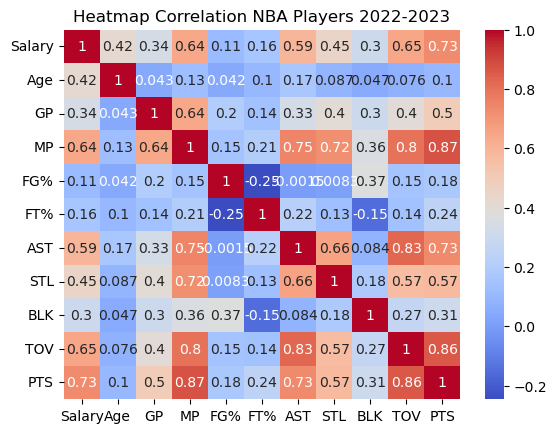

In [9]:
sns.heatmap(nba_corrmat, annot=True, cmap='coolwarm')
plt.title('Heatmap Correlation NBA Players 2022-2023')
plt.show()

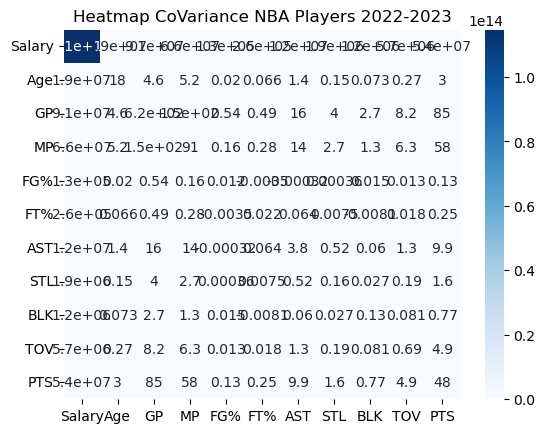

In [10]:
sns.heatmap(nba_covmat, annot=True, cmap='Blues')
plt.title('Heatmap CoVariance NBA Players 2022-2023')
plt.show()

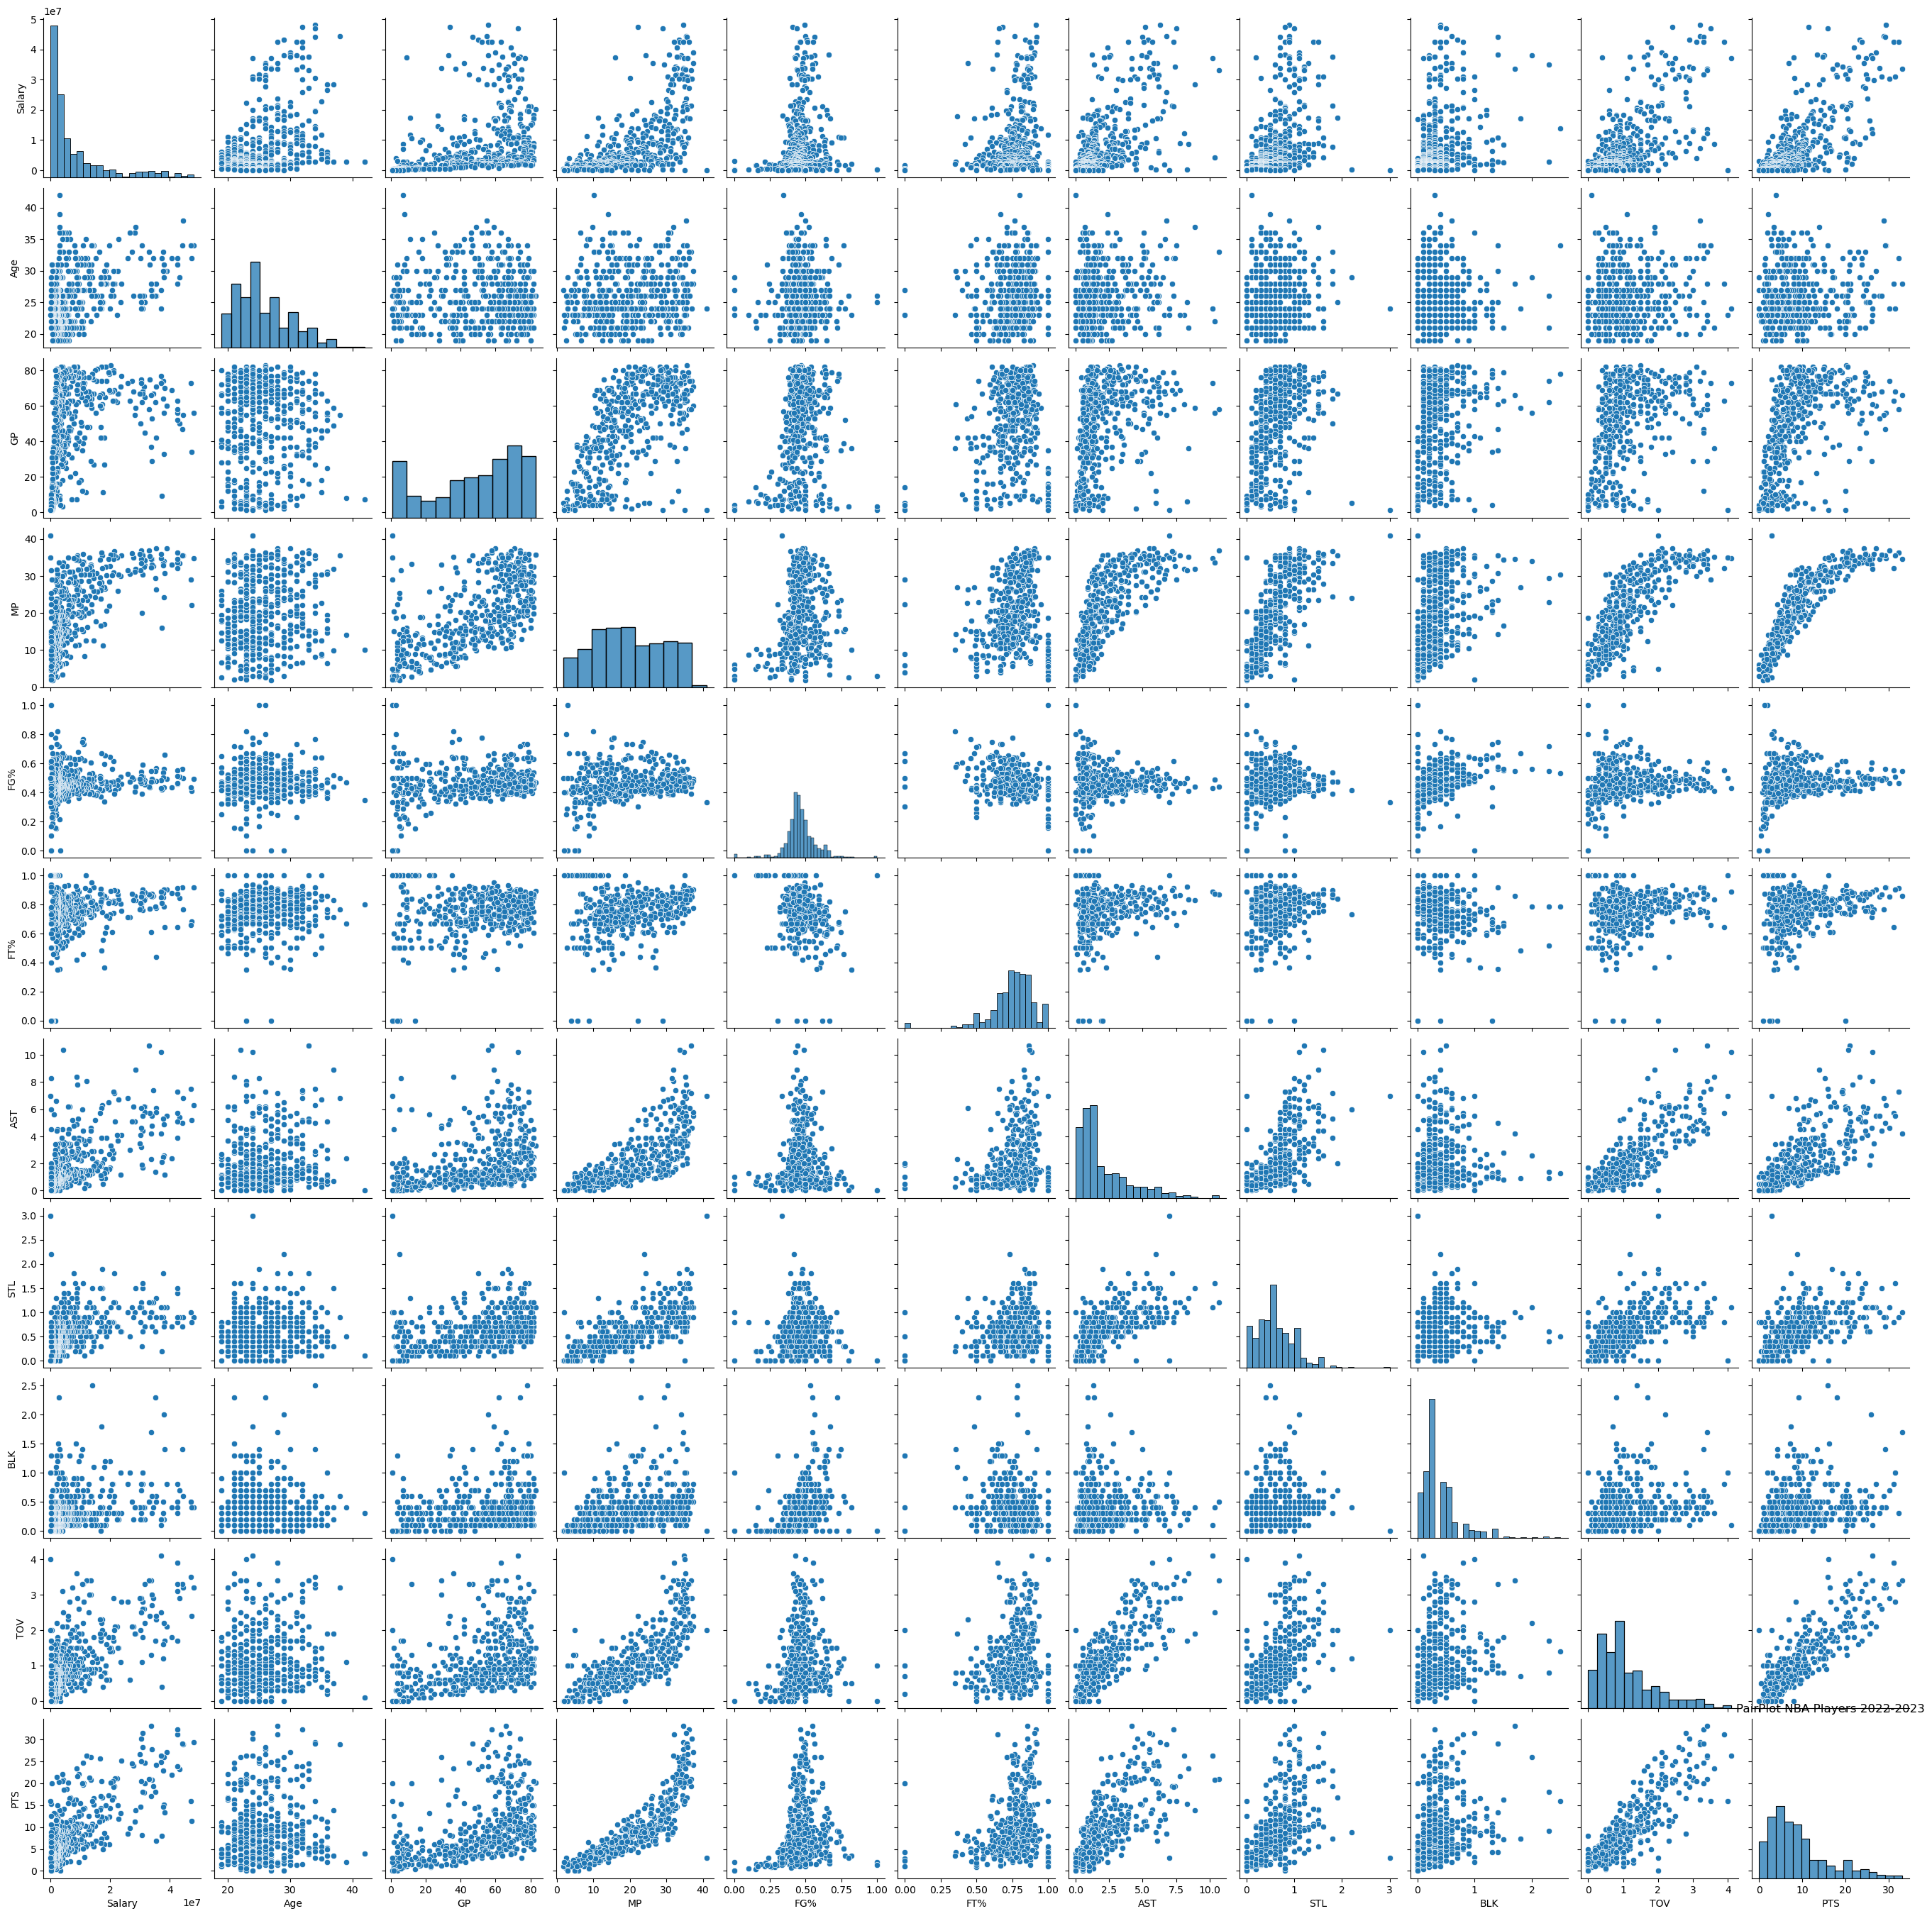

In [11]:
sns.pairplot(new_nba_stats)
plt.title('PairPlot NBA Players 2022-2023')
plt.show()

# Thankyouu!!